In [1]:
# Notebook para probar los algoritmos para mejorar el contraste y las métricas
# Importar las librerías necesarias
from ImagePreprocessing.utils import *
from ImagePreprocessing.contrast_enhancement import *
from EvaluationMetrics.evaluationMetrics import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Ruta de las imágenes
image_path = "E:/Panel_30W/P13/V24.2_I2.50_t30/JPEG_8"
background_path ="E:/Panel_30W/P13/V24.2_I2.50_t30/fondo_8/JPEG_fondo_8"
No_background_path = "E:/Panel_30W/Salida13/P8/dataset_noBG"
imagePP_path = "E:/Panel_30W/Salida13/P8bg"
image1_2Isc_path = "E:/Panel_30W/P13/V22.1_I0.9_t27.973/JPEG"
salidas_path = "D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/TestContraste"


datasetEL = read_images(image_path)
datasetBG = read_images(background_path)
dataset_noBG = read_images(No_background_path)
datasetPP = read_images(imagePP_path)

# Imprime el número de imágenes en cada dataset
# para probar que las imágenes se agregaron
print("Imágenes en el dataset EL: ", len(datasetEL))
print("Imágenes en el dataset BG: ", len(datasetBG))
print("Imágenes en el dataset noBG: ", len(dataset_noBG))
print("Imágenes en el dataset PP: ", len(datasetPP))

Imágenes en el dataset EL:  51
Imágenes en el dataset BG:  51
Imágenes en el dataset noBG:  51
Imágenes en el dataset PP:  5


In [6]:
contrast_valuesEL = []
for image in datasetEL:
    contrast_valuesEL.append(contrast_metric(image))

print("Contraste promedio en imágenes de datasetEL: ", np.mean(contrast_valuesEL))

Contraste promedio en imágenes de datasetEL:  49.1287973522965


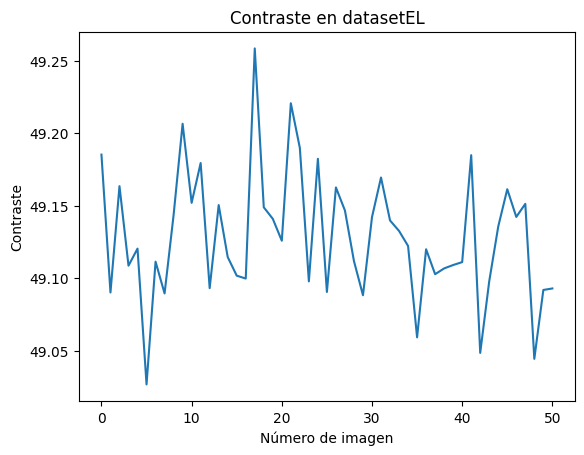

In [9]:
# Graficar la métrica contrast_metric
plt.plot(contrast_valuesEL)
plt.title("Contraste en datasetEL")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()


Métricas para medir la mejora en el contraste de las imágenes:  

* contrast_metric
* CIR
* PL = psnr / blur

Algoritmos para mejorar el contraste de una imagen EL:

* MMC (Mejora de Contraste por Morfología de Contraste Máximo)
* CLAHE (Mejora de Contraste Adaptativo basado en Histogramas Limitados)
* HE (Ecualización de Histograma)

Se cuenta con el dataset de imágenes EL originales `datasetEL`, la idea es aplicar cada algoritmo a todas las imágenes del dataset y crear nuevos dataset para cada algoritmo, luego obtener las métricas de cada algoritmo y anotar los resultados en hojas de cálcuo tipo SCV para su posterior análisis y graficación

Para analizar los resultados de comparar distintas métricas para evaluar la mejora en el contraste de las imágenes EL, y también para comparar diferentes algoritmos de mejora de contraste, puedes seguir estos pasos:

1. **Aplicación de algoritmos de mejora de contraste:**
   - Implementa los algoritmos MMC, CLAHE y HE para mejorar el contraste de las imágenes del dataset `datasetEL`. Puedes utilizar bibliotecas como OpenCV para implementar estos algoritmos.

2. **Creación de nuevos datasets para cada algoritmo:**
   - Aplica cada algoritmo a todas las imágenes del dataset `datasetEL` y guarda las imágenes resultantes en nuevos datasets separados para cada algoritmo.

3. **Cálculo de métricas:**
   - Para cada imagen en cada nuevo dataset, calcula las métricas `contrast_metric`, CIR y PL según se describe. Puedes implementar funciones para calcular estas métricas o utilizar bibliotecas existentes si están disponibles.

4. **Anotación de resultados en hojas de cálculo CSV:**
   - Crea hojas de cálculo CSV para cada métrica y algoritmo, donde cada fila represente una imagen y cada columna represente el valor de la métrica calculada para esa imagen.

5. **Análisis y graficación:**
   - Utiliza bibliotecas como Pandas y Matplotlib para cargar los datos de las hojas de cálculo CSV, realizar análisis estadísticos y crear visualizaciones como gráficos de barras o diagramas de caja para comparar las métricas entre algoritmos y evaluar la efectividad de cada algoritmo en la mejora del contraste de las imágenes.


In [ ]:
import os
## Aplicación del algoritmo MMC
datasetMMC = []
for image in datasetEL:
    datasetMMC.append(MMC(image, 7))

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetMMC`
os.makedirs(os.path.join(salidas_path, "datasetMMC"), exist_ok=True)
for i, image in enumerate(datasetMMC):
    cv2.imwrite(os.path.join(salidas_path, "datasetMMC", f"MMC_{i}.jpg"), image)

## Cálculo de métricas en el datasetMMC
contrast_valuesMMC = []
for image in datasetMMC:
    contrast_valuesMMC.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetMMC: ", np.mean(contrast_valuesMMC))

CIR_valuesMMC = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetMMC con su correspondiente en datasetMMC

for imageMMC, imageEL in zip(datasetMMC, datasetEL):
    CIR_valuesMMC.append(CIR(imageEL, imageMMC))
print("CIRC promedio en imágenes de datasetMMC: ", np.mean(CIR_valuesMMC))

PL_valuesMMC = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetMMC

for imageMMC, imageEL in zip(datasetMMC, datasetEL):
    PL_valuesMMC.append(PL(imageEL, imageMMC))
print("PL promedio en imágenes de datasetMMC: ", np.mean(PL_valuesMMC))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste MMC": contrast_valuesMMC,
    "CIR MMC": CIR_valuesMMC,
    "PL MMC": PL_valuesMMC
})
df.to_csv(salidas_path + "/metricsMMC.csv", index=False)

## Análisis y visualización de los resultados
plt.plot(contrast_valuesMMC)
plt.title("Contraste en datasetMMC")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()

plt.plot(CIR_valuesMMC)
plt.title("CIR en datasetMMC")
plt.xlabel("Número de imagen")
plt.ylabel("CIR")
plt.show()

plt.plot(PL_valuesMMC)
plt.title("PL en datasetMMC")
plt.xlabel("Número de imagen")
plt.ylabel("PL")
plt.show()
